In [ ]:
!pip install --use-deprecated=legacy-resolver --upgrade git+https://github.com/rbrtwlz/fastai_object_detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rbrtwlz/fastai_object_detection to /tmp/pip-req-build-9eu3ag66
  Running command git clone -q https://github.com/rbrtwlz/fastai_object_detection /tmp/pip-req-build-9eu3ag66
     |████████████████████████████████| 750.6 MB 17 kB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 197 kB 52.0 MB/s 
  Cloning https://github.com/bes-dev/mean_average_precision to /tmp/pip-install-zbt3gf07/mean-average-precision
  Running command git clone -q https://github.com/bes-dev/mean_average_precision /tmp/pip-install-zbt3gf07/mean-average-precision
     |████████████████████████████████| 61 kB 8.4 MB/s 
  Created wheel for fastai-object-detection: filename=fastai_object_detection-0.0.1-py3-none-any.whl size=51478 sha256=143ea57557e0edd69182ae2bed395524c24f3d258e9198d3f7e3803715a06a96
  Stored in directory: /tmp/pip-ephem-wheel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DEMO.csv')
df

Unnamed: 0  image_id                            image_path    x_max  \
0             0         1    /content/drive/MyDrive/train/1.png  1890.00   
1             1         1    /content/drive/MyDrive/train/1.png  2302.98   
2             2         2    /content/drive/MyDrive/train/2.png   896.10   
3             3         2    /content/drive/MyDrive/train/2.png  1427.21   
4             4         2    /content/drive/MyDrive/train/2.png   271.84   
..          ...       ...                                   ...      ...   
274         274        99   /content/drive/MyDrive/train/99.png  2000.27   
275         275       100  /content/drive/MyDrive/train/100.png  1222.62   
276         276       100  /content/drive/MyDrive/train/100.png  1212.09   
277         277       100  /content/drive/MyDrive/train/100.png  1218.57   
278         278       100  /content/drive/MyDrive/train/100.png   164.33   

       x_min    y_max    y_min class_name  
0      17.52  1348.44     6.30      bleed  
1    1883.74   261.24    70.40      bleed  
2     333.30   704.69     1.67      bleed  
3    1136.20   206.24    51.60      bleed  
4      77.83   334.93   159.18      stain  
..       ...      ...      ...        ...  
274   741.22  2993.21  1819.13      bleed  
275   204.82    89.80    49.40      bleed  
276   244.49   160.28   111.70      bleed  
277   239.63   216.96   183.77      bleed  
278    97.13    49.35    12.11      stain  

[279 rows x 8 columns]

In [ ]:
set(list(df['class_name']))

{'bleed', 'fade', 'stain'}

In [ ]:
from fastai.vision.all import *
from fastai_object_detection.all import *

dls = ObjectDetectionDataLoaders.from_df(df,valid_pct=0.1, bs=1,
                                         item_tfms=[],
                                         batch_tfms=[Normalize.from_stats(*imagenet_stats)])

/usr/local/lib/python3.7/dist-packages/fastai/vision/core.py:248: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:295.)
  if res is not None: self.c = res.numel()
/usr/local/lib/python3.7/dist-packages/fastai/vision/core.py:280: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:295.)
  pnts = self.encodes(cast(x.view(-1,2), TensorPoint))
/usr/local/lib/python3.7/dist-packages/fastai/torch_core.py:137: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:295.)
  if res.dtype is torch.float64: return re

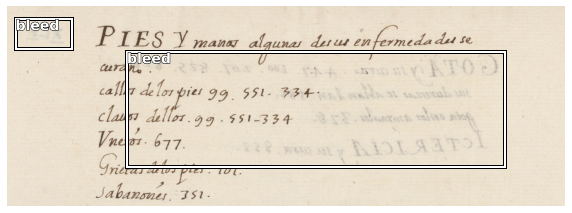

In [ ]:
dls.show_batch(figsize=(10,10))

In [ ]:
learn = fasterrcnn_learner(dls, fasterrcnn_resnet50,
                           opt_func=SGD, lr=0.005, wd=0.0005, train_bn=False,
                           metrics=[mAP_at_IoU40, mAP_at_IoU60, mAP_at_IoU80])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
learn.fit_one_cycle(20, 1.2e-03)

/usr/local/lib/python3.8/dist-packages/fastai_object_detection/callbacks.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(x1)
/usr/local/lib/python3.8/dist-packages/fastai_object_detection/callbacks.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y[k] = [torch.tensor(e) for e in yb[i]]


In [ ]:
learn.save('/content/drive/MyDrive/document-epoch-3')

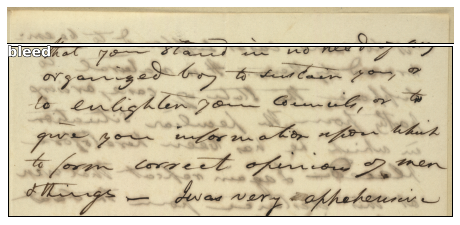

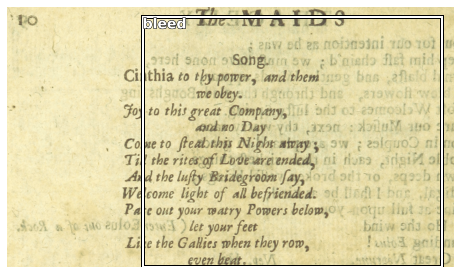

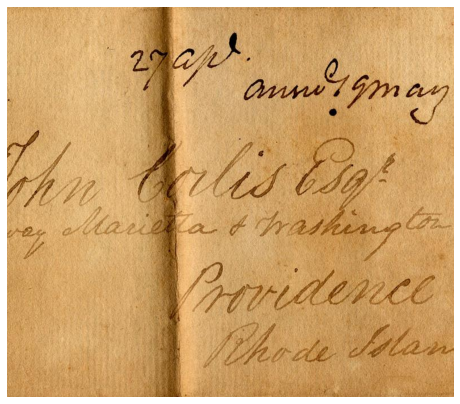

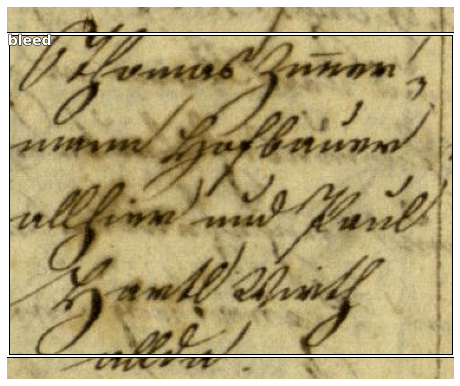

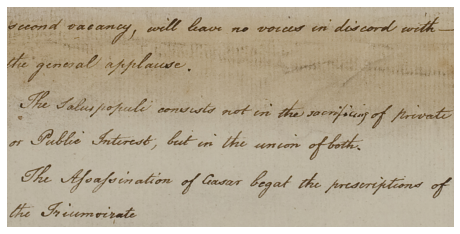

In [ ]:
learn.show_results(max_n=5)

In [ ]:
model=learn.load('/content/drive/MyDrive/document-epoch-3')
model.eval()

AttributeError: ignored

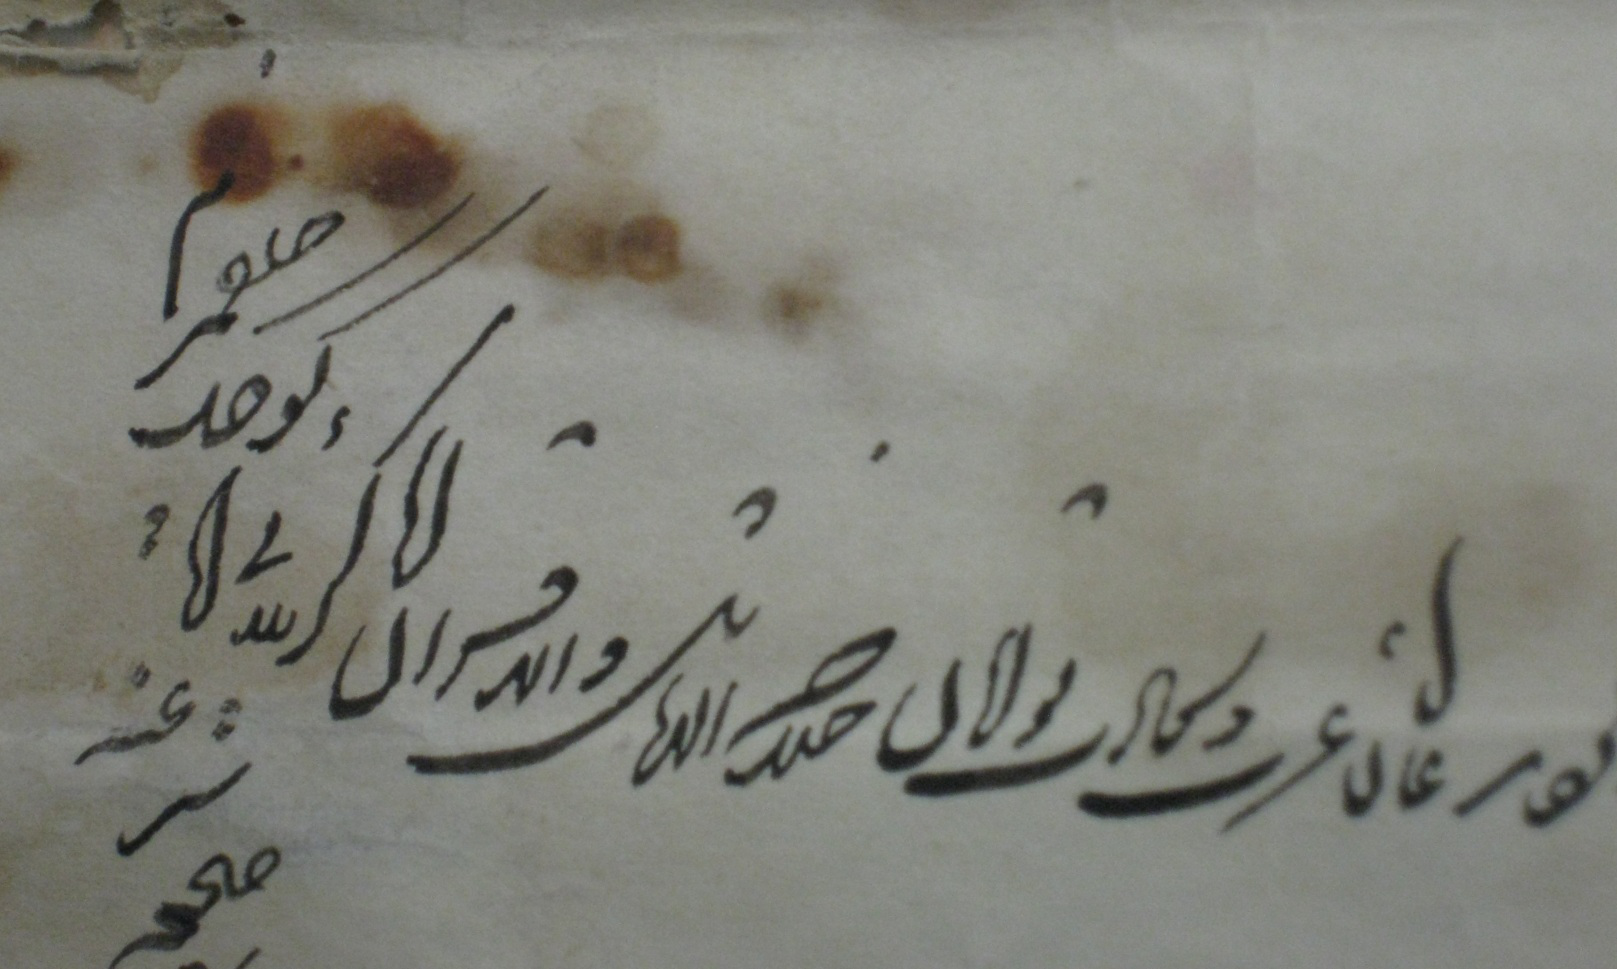

In [ ]:
img = PILImage.create("/content/drive/MyDrive/train/112.png")
img

In [ ]:
model.get_preds(items=[img],
                item_tfms=[Resize(512, method="pad", pad_mode="zeros")],
                batch_tfms=[Normalize.from_stats(*imagenet_stats)]
                )

([TensorImage([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]]])],
 [TensorImage([[ 19.0793, 122.6265,  46.5820, 172.7365],
          [ 13.7218, 139.8779,  42.2406, 172.1411],
          [ 41.0340, 147.6009,  56.3839, 179.8823],
          [ 47.8719, 146.2888,  54.5711, 174.0869],
          [ 50.2616, 146.2991,  56.3565, 173.5135],
    

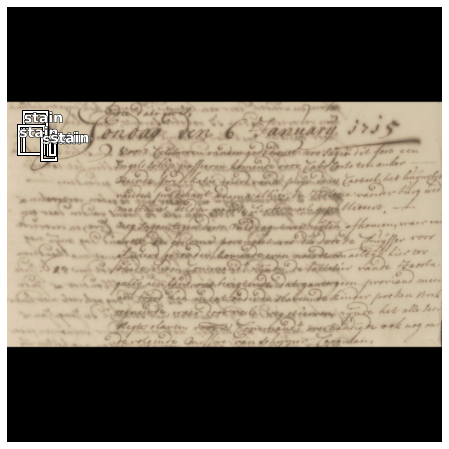

In [ ]:
model.show_results(items=[img],
                   item_tfms=[Resize(512, method="pad", pad_mode="zeros")],
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)]
                )

In [ ]:
#gradcam
learn.load('/content/drive/MyDrive/document-epoch-3')

/usr/local/lib/python3.8/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [ ]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.8 MB 15.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=5aa69c27396a4765e77286edab36a27dea17673be0f5441ea630864e3ed16f68
  Stored in directory: /root/.cache/pip/wheels/a4/6a/11/fa213a7aaae1a99a800b86bdd1cc95bc9c7d7914b0859663b8
Successfully built grad-cam


(768, 1320)


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.


[]


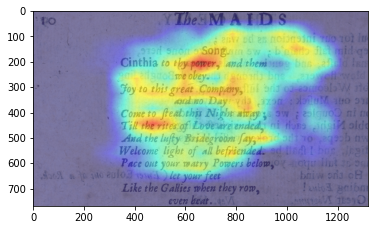

In [ ]:
# Import the required libraries
import torch
import cv2
import torchvision.transforms as transforms
from pytorch_grad_cam import AblationCAM, EigenCAM
from pytorch_grad_cam.ablation_layer import AblationLayerFasterRCNN
from pytorch_grad_cam.utils.model_targets import FasterRCNNBoxScoreTarget
from pytorch_grad_cam.utils.reshape_transforms import fasterrcnn_reshape_transform
from pytorch_grad_cam.utils.image import show_cam_on_image, scale_accross_batch_and_channels, scale_cam_image
import torchvision
from PIL import Image

coco_names = ['__background__', 'bleed','fade', 'stain']

image = PILImage.create("/content/drive/MyDrive/train/46.png")
print(image.shape)
image_float_np = np.float32(image) / 255
# define the torchvision image transforms
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])



input_tensor = transform(image)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_tensor = input_tensor.to(device)
# Add a batch dimension:
input_tensor = input_tensor.unsqueeze(0)

learn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False,num_classes=4)
learn.load_state_dict(torch.load('/content/drive/MyDrive/document-epoch-3.pth'))
learn.eval().to(device)


def predict(input_tensor, model, device, detection_threshold):
    outputs = model(input_tensor)
    pred_classes = [coco_names[i] for i in outputs[0]['labels'].cpu().numpy()]
    pred_labels = outputs[0]['labels'].cpu().numpy()
    pred_scores = outputs[0]['scores'].detach().cpu().numpy()
    pred_bboxes = outputs[0]['boxes'].detach().cpu().numpy()

    boxes, classes, labels, indices = [], [], [], []
    for index in range(len(pred_scores)):
        if pred_scores[index] >= detection_threshold:
            boxes.append(pred_bboxes[index].astype(np.int32))
            classes.append(pred_classes[index])
            labels.append(pred_labels[index])
            indices.append(index)
    boxes = np.int32(boxes)
    return boxes, classes, labels, indices

boxes, classes, labels, indices = predict(input_tensor, learn, device, 0.5)

target_layers = [learn.backbone]
targets = [FasterRCNNBoxScoreTarget(labels=labels, bounding_boxes=boxes)]
cam = EigenCAM(learn,
               target_layers,
               use_cuda=torch.cuda.is_available(),
               reshape_transform=fasterrcnn_reshape_transform)

grayscale_cam = cam(input_tensor, targets=targets)
# Take the first image in the batch:
grayscale_cam = grayscale_cam[0, :]
cam_image = show_cam_on_image(image_float_np, grayscale_cam, use_rgb=True)
import matplotlib.pyplot as plt
plt.imshow(cam_image)

NameError: ignored

In [ ]:
learn.show_results(items=[image],
                   item_tfms=[],
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)]
                )

AttributeError: ignored

NameError: ignored

In [ ]:
#gradcam

IndentationError: ignored